 ###### Pool_card   -> # de Cartas que o usuário ja selecionou
 ###### Pack_card   -> # de Cartas que saíram no pacote em questão
 ###### Pack_Number -> # Rodada do pack atual
 ###### Pick_Number -> # Rodada do pick atual

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


In [32]:
#Read all_decks file and get integer columns
df_deck = pd.read_csv("Data/all_decks.csv",nrows=1)
#(columns int64 -> int8)
columns = []
for column in df_deck.columns.unique():
    if 'pool_' in column:
        columns.append(column)
    if 'pack_card_' in column:
        columns.append(column)

# Make the dtype dict (int64 -> int8)
conversion_integers_columns = {item: np.int8 for item in columns}
conversion_integers_columns['user_game_win_rate_bucket'] = np.float32
conversion_integers_columns['pick'] = 'category'

In [33]:
df_deck = pd.read_csv("Data/all_decks.csv",dtype=conversion_integers_columns)
#best_users_df = pd.read_csv("Data/draft_data_best_players_sc.csv",dtype=conversion_integers_columns)

# Data Exploration

In [34]:
df_deck.head(2)

,expansion,event_type,draft_id,draft_time,rank,event_match_wins,event_match_losses,pack_number,pick_number,pick,pick_maindeck_rate,pick_sideboard_in_rate,pack_card_Adaptive Automaton,pack_card_Aeronaut Cavalry,pack_card_Aeronaut's Wings,pack_card_Aetherflux Reservoir,pack_card_Air Marshal,pack_card_Airlift Chaplain,pack_card_Alloy Animist,pack_card_Altar of Dementia,pack_card_Ambush Paratrooper,pack_card_Arbalest Engineers,pack_card_Arcane Proxy,pack_card_Argivian Avenger,"pack_card_Argoth, Sanctum of Nature",pack_card_Argothian Opportunist,pack_card_Argothian Sprite,pack_card_Arms Race,pack_card_Ashnod's Altar,pack_card_Ashnod's Harvester,pack_card_Ashnod's Intervention,"pack_card_Ashnod, Flesh Mechanist",pack_card_Astral Cornucopia,pack_card_Audacity,pack_card_Autonomous Assembler,pack_card_Awaken the Woods,pack_card_Battery Bearer,pack_card_Battlefield Butcher,pack_card_Battlefield Forge,pack_card_Bitter Reunion,pack_card_Blackblade Reforged,pack_card_Bladecoil Serpent,pack_card_Blanchwood Armor,pack_card_Blanchwood Prowler,pack_card_Blast Zone,pack_card_Blitz Automaton,pack_card_Bone Saw,pack_card_Boulderbranch Golem,pack_card_Brotherhood's End,pack_card_Brushland,pack_card_Burnished Hart,pack_card_Burrowing Razormaw,pack_card_Bushwhack,pack_card_Caged Sun,pack_card_Calamity's Wake,pack_card_Carrion Locust,pack_card_Chromatic Lantern,pack_card_Chromatic Star,pack_card_Citanul Stalwart,pack_card_Cityscape Leveler,pack_card_Clay Champion,pack_card_Clay Revenant,pack_card_Cloud Key,pack_card_Coastal Bulwark,pack_card_Combat Courier,pack_card_Combat Thresher,pack_card_Conscripted Infantry,pack_card_Corrupt,pack_card_Cradle Clearcutter,pack_card_Curate,pack_card_Deadly Riposte,pack_card_Deathbloom Ritualist,pack_card_Defabricate,pack_card_Defense Grid,pack_card_Demolition Field,pack_card_Depth Charge Colossus,pack_card_Desynchronize,pack_card_Diabolic Intent,pack_card_Disciples of Gix,pack_card_Disenchant,pack_card_Disfigure,pack_card_Door to Nothingness,pack_card_Draconic Destiny,"pack_card_Drafna, Founder of Lat-Nam",pack_card_Dreams of Steel and Oil,pack_card_Dredging Claw,pack_card_Dwarven Forge-Chanter,pack_card_Elsewhere Flask,pack_card_Emergency Weld,pack_card_Energy Refractor,pack_card_Epic Confrontation,pack_card_Evangel of Synthesis,pack_card_Evolving Wilds,pack_card_Excavation Explosion,pack_card_Fade from History,pack_card_Fallaji Archaeologist,pack_card_Fallaji Chaindancer,pack_card_Fallaji Dragon Engine,pack_card_Fallaji Excavation,pack_card_Fallaji Vanguard,pack_card_Fateful Handoff,pack_card_Fauna Shaman,"pack_card_Feldon, Ronom Excavator",pack_card_Flow of Knowledge,pack_card_Fog of War,pack_card_Forest,pack_card_Forging the Anchor,pack_card_Fortified Beachhead,pack_card_Foundry Inspector,pack_card_Gaea's Courser,pack_card_Gaea's Gift,pack_card_Giant Cindermaw,pack_card_Giant Growth,pack_card_Gilded Lotus,pack_card_Gix's Caress,pack_card_Gix's Command,"pack_card_Gix, Yawgmoth Praetor",pack_card_Gixian Infiltrator,pack_card_Gixian Puppeteer,pack_card_Gixian Skullflayer,pack_card_Gnarlroot Pallbearer,pack_card_Gnawing Vermin,pack_card_Go for the Throat,pack_card_Goblin Blast-Runner,pack_card_Goblin Charbelcher,pack_card_Goblin Firebomb,pack_card_Goring Warplow,pack_card_Great Desert Prospector,pack_card_Gruesome Realization,pack_card_Gurgling Anointer,"pack_card_Gwenna, Eyes of Gaea","pack_card_Hajar, Loyal Bodyguard",pack_card_Hall of Tagsin,"pack_card_Harbin, Vanguard Aviator",pack_card_Haywire Mite,pack_card_Heavyweight Demolisher,pack_card_Helm of the Host,pack_card_Hero of the Dunes,pack_card_Hoarding Recluse,pack_card_Horned Stoneseeker,pack_card_Hostile Negotiations,pack_card_Howling Mine,pack_card_Hulking Metamorph,pack_card_Hurkyl's Final Meditation,"pack_card_Hurkyl, Master Wizard",pack_card_Ichor Wellspring,pack_card_In the Trenches,pack_card_Inspiring Statuary,pack_card_Involuntary Cooldown,pack_card_Iron-Craw Crusher,pack_card_Island,pack_card_Ivory Tower,pack_card_Jalum Tome,pack_card_Journeyer's Ki

<AxesSubplot:xlabel='rank', ylabel='user_game_win_rate_bucket'>

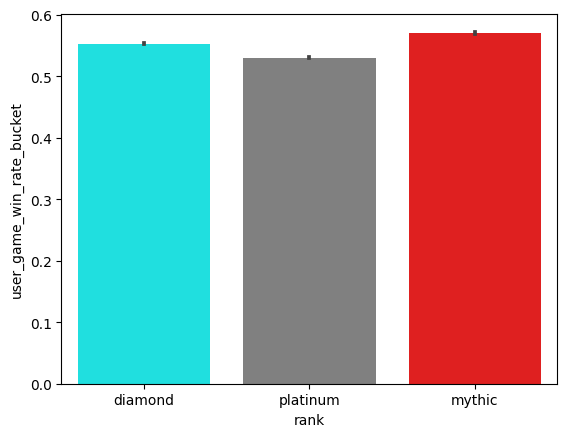

In [35]:
sns.barplot(df_deck,x=df_deck['rank'], y=df_deck['user_game_win_rate_bucket'],estimator='mean', palette=['cyan', 'gray', 'red'])

<AxesSubplot:xlabel='rank', ylabel='user_n_games_bucket'>

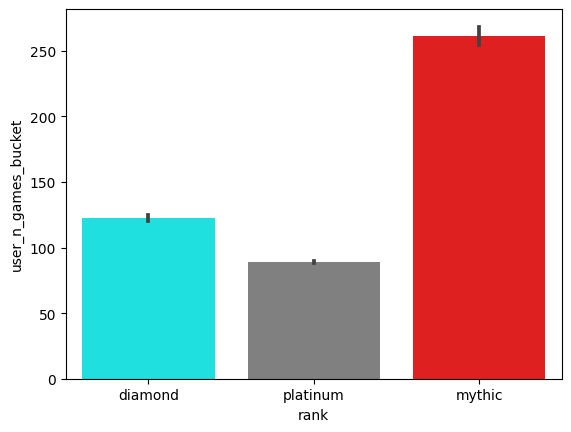

In [36]:
sns.barplot(df_deck,x=df_deck['rank'], y=df_deck['user_n_games_bucket'], palette=['cyan', 'gray', 'red'])

### First step -> Make the sinergy between the cards
    Sinergy = Quantity of if one card appears on one deck -> this other card will appears too.

In [37]:
df_deck.head(2)

,expansion,event_type,draft_id,draft_time,rank,event_match_wins,event_match_losses,pack_number,pick_number,pick,pick_maindeck_rate,pick_sideboard_in_rate,pack_card_Adaptive Automaton,pack_card_Aeronaut Cavalry,pack_card_Aeronaut's Wings,pack_card_Aetherflux Reservoir,pack_card_Air Marshal,pack_card_Airlift Chaplain,pack_card_Alloy Animist,pack_card_Altar of Dementia,pack_card_Ambush Paratrooper,pack_card_Arbalest Engineers,pack_card_Arcane Proxy,pack_card_Argivian Avenger,"pack_card_Argoth, Sanctum of Nature",pack_card_Argothian Opportunist,pack_card_Argothian Sprite,pack_card_Arms Race,pack_card_Ashnod's Altar,pack_card_Ashnod's Harvester,pack_card_Ashnod's Intervention,"pack_card_Ashnod, Flesh Mechanist",pack_card_Astral Cornucopia,pack_card_Audacity,pack_card_Autonomous Assembler,pack_card_Awaken the Woods,pack_card_Battery Bearer,pack_card_Battlefield Butcher,pack_card_Battlefield Forge,pack_card_Bitter Reunion,pack_card_Blackblade Reforged,pack_card_Bladecoil Serpent,pack_card_Blanchwood Armor,pack_card_Blanchwood Prowler,pack_card_Blast Zone,pack_card_Blitz Automaton,pack_card_Bone Saw,pack_card_Boulderbranch Golem,pack_card_Brotherhood's End,pack_card_Brushland,pack_card_Burnished Hart,pack_card_Burrowing Razormaw,pack_card_Bushwhack,pack_card_Caged Sun,pack_card_Calamity's Wake,pack_card_Carrion Locust,pack_card_Chromatic Lantern,pack_card_Chromatic Star,pack_card_Citanul Stalwart,pack_card_Cityscape Leveler,pack_card_Clay Champion,pack_card_Clay Revenant,pack_card_Cloud Key,pack_card_Coastal Bulwark,pack_card_Combat Courier,pack_card_Combat Thresher,pack_card_Conscripted Infantry,pack_card_Corrupt,pack_card_Cradle Clearcutter,pack_card_Curate,pack_card_Deadly Riposte,pack_card_Deathbloom Ritualist,pack_card_Defabricate,pack_card_Defense Grid,pack_card_Demolition Field,pack_card_Depth Charge Colossus,pack_card_Desynchronize,pack_card_Diabolic Intent,pack_card_Disciples of Gix,pack_card_Disenchant,pack_card_Disfigure,pack_card_Door to Nothingness,pack_card_Draconic Destiny,"pack_card_Drafna, Founder of Lat-Nam",pack_card_Dreams of Steel and Oil,pack_card_Dredging Claw,pack_card_Dwarven Forge-Chanter,pack_card_Elsewhere Flask,pack_card_Emergency Weld,pack_card_Energy Refractor,pack_card_Epic Confrontation,pack_card_Evangel of Synthesis,pack_card_Evolving Wilds,pack_card_Excavation Explosion,pack_card_Fade from History,pack_card_Fallaji Archaeologist,pack_card_Fallaji Chaindancer,pack_card_Fallaji Dragon Engine,pack_card_Fallaji Excavation,pack_card_Fallaji Vanguard,pack_card_Fateful Handoff,pack_card_Fauna Shaman,"pack_card_Feldon, Ronom Excavator",pack_card_Flow of Knowledge,pack_card_Fog of War,pack_card_Forest,pack_card_Forging the Anchor,pack_card_Fortified Beachhead,pack_card_Foundry Inspector,pack_card_Gaea's Courser,pack_card_Gaea's Gift,pack_card_Giant Cindermaw,pack_card_Giant Growth,pack_card_Gilded Lotus,pack_card_Gix's Caress,pack_card_Gix's Command,"pack_card_Gix, Yawgmoth Praetor",pack_card_Gixian Infiltrator,pack_card_Gixian Puppeteer,pack_card_Gixian Skullflayer,pack_card_Gnarlroot Pallbearer,pack_card_Gnawing Vermin,pack_card_Go for the Throat,pack_card_Goblin Blast-Runner,pack_card_Goblin Charbelcher,pack_card_Goblin Firebomb,pack_card_Goring Warplow,pack_card_Great Desert Prospector,pack_card_Gruesome Realization,pack_card_Gurgling Anointer,"pack_card_Gwenna, Eyes of Gaea","pack_card_Hajar, Loyal Bodyguard",pack_card_Hall of Tagsin,"pack_card_Harbin, Vanguard Aviator",pack_card_Haywire Mite,pack_card_Heavyweight Demolisher,pack_card_Helm of the Host,pack_card_Hero of the Dunes,pack_card_Hoarding Recluse,pack_card_Horned Stoneseeker,pack_card_Hostile Negotiations,pack_card_Howling Mine,pack_card_Hulking Metamorph,pack_card_Hurkyl's Final Meditation,"pack_card_Hurkyl, Master Wizard",pack_card_Ichor Wellspring,pack_card_In the Trenches,pack_card_Inspiring Statuary,pack_card_Involuntary Cooldown,pack_card_Iron-Craw Crusher,pack_card_Island,pack_card_Ivory Tower,pack_card_Jalum Tome,pack_card_Journeyer's Ki

In [38]:
# Get card list
card_list = []
for column in df_deck.columns.unique():
    if 'pool_' in column:
        card = column.replace('pool_','')
        card_list.append(card)

In [39]:
# Build the co-occurrence matrix from frequency
frequenciy_matrix = np.array(df_deck[["pool_" + c for c in card_list]].astype(int))
cooccurrence_matrix = np.dot(frequenciy_matrix.transpose(),frequenciy_matrix)
cooccurrence_matrix_diagonal = np.diagonal(cooccurrence_matrix)

Text(0.5, 1.0, 'Co-occurrence matrix')

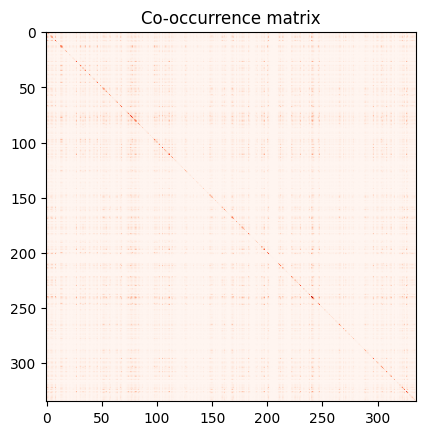

In [40]:
plt.imshow(np.array(cooccurrence_matrix), cmap="Reds");
plt.title('Co-occurrence matrix')

Share of card combinations that never happened:  3%


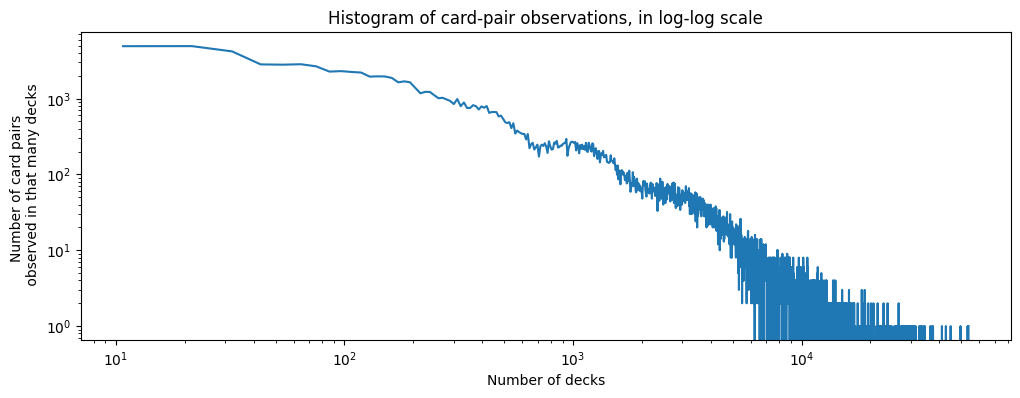

In [41]:
print(f"Share of card combinations that never happened: {np.sum(cooccurrence_matrix.flatten()==0)/cooccurrence_matrix.flatten().shape[0]*100:2.0f}%")

ty, tx = np.histogram(cooccurrence_matrix.flatten(), bins=5000)
plt.figure(figsize=(12,4))
plt.plot(tx[1:], ty);
plt.yscale('log')
plt.xscale('log')
plt.title('Histogram of card-pair observations, in log-log scale')
plt.xlabel('Number of decks')
plt.ylabel('Number of card pairs \n observed in that many decks');

In [122]:
# List of cards that weren't drafted, but are in the db
resumed_card_list = card_list.copy()
occurrences = df_deck[["pool_" + c for c in card_list]].sum()
for i in range(len(card_list)):
    if occurrences[i] == 0:
        resumed_card_list.remove(i)
        print(str(i) + " " + card_list[i])

93 Forest
138 Island
185 Mountain
206 Plains
272 Swamp


In [43]:
occurrences

pool_Adaptive Automaton       1026
pool_Aeronaut Cavalry        17178
pool_Aeronaut's Wings        15711
pool_Aetherflux Reservoir      398
pool_Air Marshal             14211
                             ...  
pool_Yotian Frontliner        5764
pool_Yotian Medic            11133
pool_Yotian Tactician         5932
pool_Zephyr Sentinel          7221
pool_Mishra's Bauble          5139
Length: 335, dtype: int64

In [44]:
all_cards_df = pd.read_csv('Data/all_cards.csv')
all_cards_bro = all_cards_df['name']

In [45]:
for name in card_list:
    if name not in all_cards_bro.to_list():
        print(name)

### Data Resume ALL_CARDS

In [46]:
for card in card_list:
    all_cards_df.loc[all_cards_df.name == card,'count'] = len(df_deck[df_deck['pool_'+card] != 0])
    all_cards_df.loc[all_cards_df.name == card,'freq'] = df_deck['pool_'+card].sum()
    all_cards_df.loc[all_cards_df.name == card,'avr'] = df_deck['pool_'+card].sum()/df_deck.astype(bool).sum(axis=1).sum() # quantidade de cartas

In [47]:
all_cards_df.head(5)

,name,rarity,color_identity,colors,count,freq,avr
0,Adaptive Automaton,rare,T,T,1024.0,1026.0,0.000406
1,Aeronaut Cavalry,common,W,W,12055.0,17178.0,0.006793
2,Aeronaut's Wings,common,T,T,14480.0,15711.0,0.006213
3,Aetherflux Reservoir,rare,T,T,398.0,398.0,0.000157
4,Air Marshal,common,U,U,10644.0,14211.0,0.005619


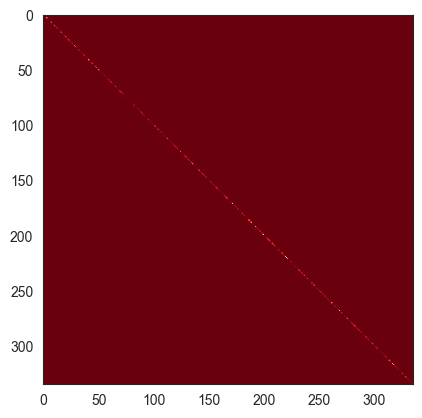

In [145]:
nDrafts = len(df_deck)
prob = cooccurrence_matrix*1.0 # Make a copy, and also make symmetric
freq = np.array(all_cards_df['freq'])
for i in range(len(card_list)):
    for j in range(i+1):
        if freq[i]>0 and freq[j]>0:
            #print(cooccurrence_matrix[i,j])
            #print(float(freq[i]))
            #print(float(freq[j]))
            #print(j)
            #print(i)
            prob[i,j] = cooccurrence_matrix[i,j]/float(freq[i])/float(freq[j])*nDrafts
            prob[j,i] = prob[i,j]
        #if j == i:
        #    prob[j,i] = 0
        
dist = (1-0.99*prob/prob.max())
plt.imshow((dist), cmap="Reds");

In [146]:
import sklearn.manifold as skm
fit = skm.locally_linear_embedding(dist, n_components=2, n_neighbors=len(freq)-1)
fit = fit[0] # For some reason it returns a tuple

all_cards_df['x'] = fit[:,0] 
all_cards_df['y'] = fit[:,1] 

#embedding = MDS(n_components=2, dissimilarity='precomputed', max_iter=1000, eps=0.0001)
#fit = embedding.fit_transform(dist2)

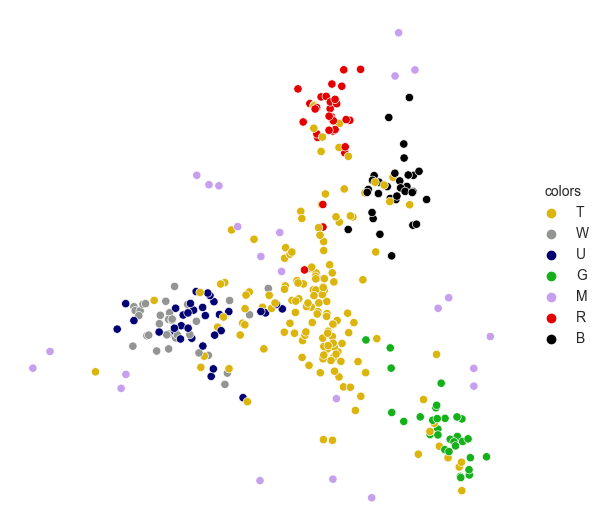

In [147]:
#%matplotlib inline
# U -> BLUE
# B -> BLACK
# M -> MULTI
myPal = sns.xkcd_palette(["gold","grey","deep blue","green","lavender","red","black"])
s = sns.relplot(data=all_cards_df,x="x",y="y",hue="colors",palette=myPal)
s.fig.set_size_inches(7,6)
sns.set_style("white")
s.despine(left=True,bottom=True)
s.set(xticklabels=[],yticklabels=[],xlabel='',ylabel='');

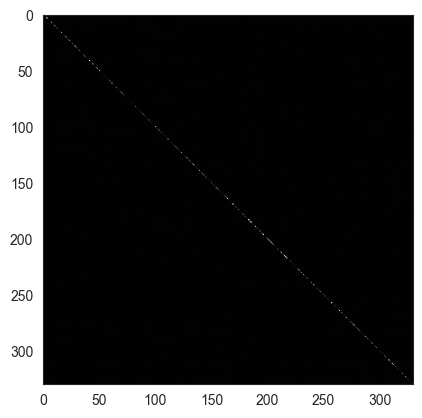

In [148]:
# Remove missing cards from other arrays
# (I make copies of both arrays for some reason, just in case)

dist2 = dist.copy()
dist2 = dist2[freq>0,:]
dist2 = dist2[:,freq>0] # For some reason if I try to subset both rows and columns together, it outputs something stupid
plt.imshow(dist2, cmap="Greys");

freq2 = freq[freq>0]

In [ ]:
#%matplotlib inline
# U -> BLUE
# B -> BLACK
# M -> MULTI
myPal = sns.xkcd_palette(["gold","grey","deep blue","green","lavender","red","black"])
s = sns.relplot(data=all_cards_df,x="x",y="y",hue="colors",palette=myPal)
s.fig.set_size_inches(7,6)
sns.set_style("white")
s.despine(left=True,bottom=True)
s.set(xticklabels=[],yticklabels=[],xlabel='',ylabel='');